In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "Previous_data/log_of_counts/forecasted_counts/block_0103/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [5]:
averaged_forecasts_csvs.sort()
averaged_forecasts_csvs

['averaged_forecasts_sub_0.csv',
 'averaged_forecasts_sub_1.csv',
 'averaged_forecasts_sub_10.csv',
 'averaged_forecasts_sub_11.csv',
 'averaged_forecasts_sub_2.csv',
 'averaged_forecasts_sub_3.csv',
 'averaged_forecasts_sub_4.csv',
 'averaged_forecasts_sub_5.csv',
 'averaged_forecasts_sub_6.csv',
 'averaged_forecasts_sub_7.csv',
 'averaged_forecasts_sub_8.csv',
 'averaged_forecasts_sub_9.csv']

In [6]:
# add the 10, 11 at the end
csv_files_10_11 = ['averaged_forecasts_sub_10.csv', 'averaged_forecasts_sub_11.csv']

In [7]:
other_files = [i for i in averaged_forecasts_csvs if i not in csv_files_10_11]

In [8]:
ordered_csv_files = other_files + csv_files_10_11

In [9]:
ordered_csv_files

['averaged_forecasts_sub_0.csv',
 'averaged_forecasts_sub_1.csv',
 'averaged_forecasts_sub_2.csv',
 'averaged_forecasts_sub_3.csv',
 'averaged_forecasts_sub_4.csv',
 'averaged_forecasts_sub_5.csv',
 'averaged_forecasts_sub_6.csv',
 'averaged_forecasts_sub_7.csv',
 'averaged_forecasts_sub_8.csv',
 'averaged_forecasts_sub_9.csv',
 'averaged_forecasts_sub_10.csv',
 'averaged_forecasts_sub_11.csv']

In [10]:
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

In [11]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [12]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,1.386294,1.540102,1.611060,1.675494,1.974523,2.028504,1.098615,0.784900,1.468809,1.894167,...,0.693474,0.511697,0.504370,0.988406,1.116603,1.117703,1.609424,1.738160,0.000000,-0.053200
1,1.609941,1.498003,1.566259,1.648187,2.185501,2.160235,1.072574,0.755395,1.795093,1.688621,...,0.158616,0.201026,1.091066,0.882195,1.296354,1.278564,1.671756,1.738056,0.000000,-0.924761
2,1.609469,1.531767,1.610357,1.753090,2.037852,2.020327,0.693146,0.879852,1.609407,1.836255,...,0.000005,0.627876,1.386294,1.103328,1.386294,1.347079,1.945908,1.747236,0.000013,0.466619
3,1.386294,1.381734,1.609438,1.480644,1.609444,2.461314,0.405465,0.710695,1.386294,1.334232,...,0.405465,-0.553727,0.693147,0.642528,1.052637,0.630401,1.625379,1.615999,0.000000,-1.673987
4,1.386294,1.461616,1.613938,1.527637,1.728711,2.086601,0.685896,0.757895,1.098612,1.127950,...,0.022302,-0.564328,1.098612,0.462653,0.693163,0.763336,1.790403,1.602396,0.008069,-0.494425


In [13]:
combined_df.shape

(7, 24)

In [14]:
# get the true values
True_values_df = combined_df[['True_value']]

In [15]:
True_values_df

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,1.386294,1.611060,1.974523,1.098615,1.468809,1.598489,2.378505,0.693474,0.504370,1.116603,1.609424,0.000000
1,1.609941,1.566259,2.185501,1.072574,1.795093,1.437771,1.615950,0.158616,1.091066,1.296354,1.671756,0.000000
2,1.609469,1.610357,2.037852,0.693146,1.609407,1.608518,1.844651,0.000005,1.386294,1.386294,1.945908,0.000013
3,1.386294,1.609438,1.609444,0.405465,1.386294,1.399817,1.945906,0.405465,0.693147,1.052637,1.625379,0.000000
4,1.386294,1.613938,1.728711,0.685896,1.098612,1.625379,1.833479,0.022302,1.098612,0.693163,1.790403,0.008069
5,1.609438,1.953659,1.800381,1.081147,1.098612,1.632744,1.911756,1.117335,0.693147,0.699477,1.945249,0.693147
6,0.693147,1.704748,1.640148,0.002523,1.386126,1.098612,1.847514,1.097832,0.693484,0.693147,1.386302,0.000000


In [16]:
exp_true = np.exp(True_values_df)-1

In [17]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [18]:
sum_true_values

0    40.000662
1    39.000001
2    41.000000
3    31.000000
4    32.000000
5    40.002086
6    27.000176
dtype: float64

In [19]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [20]:
Forecasted_values_df

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,1.540102,1.675494,2.028504,0.784900,1.894167,1.478601,1.870032,0.511697,0.988406,1.117703,1.738160,-0.053200
1,1.498003,1.648187,2.160235,0.755395,1.688621,1.497098,1.802772,0.201026,0.882195,1.278564,1.738056,-0.924761
2,1.531767,1.753090,2.020327,0.879852,1.836255,1.548014,2.099078,0.627876,1.103328,1.347079,1.747236,0.466619
3,1.381734,1.480644,2.461314,0.710695,1.334232,1.504645,1.791300,-0.553727,0.642528,0.630401,1.615999,-1.673987
4,1.461616,1.527637,2.086601,0.757895,1.127950,1.519715,1.747172,-0.564328,0.462653,0.763336,1.602396,-0.494425
5,1.489195,1.546017,2.234867,0.748311,1.387263,1.510969,1.725025,0.531948,0.879876,1.012841,1.684974,-0.604476
6,1.459219,1.392467,2.364792,0.758045,1.458840,1.517912,1.735071,0.531914,0.769312,0.343341,1.611400,-1.613033


In [21]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [22]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,3.665067,4.341434,6.602704,1.192187,5.647011,3.386805,5.488505,0.668119,1.686947,2.057823,4.686872,-0.051809
1,3.472746,4.197547,7.673176,1.128452,4.412011,3.468701,5.066442,0.222657,1.416197,2.591478,4.686281,-0.603374
2,3.626345,4.772414,6.540790,1.410543,5.272999,3.702122,7.158646,0.873627,2.014179,2.846174,4.738721,0.594594
3,2.981800,3.395774,10.720206,1.035406,2.797079,3.502553,4.997245,-0.425197,0.901281,0.878363,4.032914,-0.812502
4,3.312925,3.607279,7.057484,1.133781,2.089318,3.570924,4.738351,-0.431258,0.588281,1.145421,3.964914,-0.390079
5,3.433525,3.692742,8.345238,1.113428,3.003875,3.531121,4.612660,0.702245,1.410601,1.753411,4.392311,-0.453639
6,3.302596,3.024766,9.641825,1.134100,3.300967,3.562690,4.669331,0.702188,1.158280,0.409650,4.009820,-0.800718


### May need to change the sum to 0 out the negative predictions

In [23]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [24]:
sum_forecasted_values

0    39.371665
1    37.732315
2    43.551154
3    34.004923
4    30.387340
5    35.537518
6    34.115494
dtype: float64

In [25]:
# concatenate the sum dataframes
block_0104_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [26]:
block_0104_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [27]:
block_0104_true_and_forecasted_values_df

,True_count,Forecasted_count
0,40.000662,39.371665
1,39.000001,37.732315
2,41.000000,43.551154
3,31.000000,34.004923
4,32.000000,30.387340
5,40.002086,35.537518
6,27.000176,34.115494


In [28]:
block_0104_true_and_forecasted_values_df.to_csv("Previous_data/log_of_counts/final_forecasted_counts/block_0103_finals_forecasts.csv", index = False)

In [29]:
# # well we need to verify that the above true values are indeed correct
# from preprocess script we have the following counts
# [43, 49, 53, 59, 45, 42, 34, 39, 37, 43, 41, 39, 43, 40, 39, 41, 31, 32, 40, 29] # the last seven numbers match with what we have.

In [30]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

3.5996312402374997

In [31]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

2.9493295585233525

In [32]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.7308135960426592, pvalue=0.062073033882574506)

In [33]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

0.5161277127401531

In [34]:
# Getting the coverages and the widths for the forecasted values - This can be done with the saved all forecasts npy files
# location for the forecast files (all forecasts)
location_all_forecasts = 'Previous_data/log_of_counts/forecasted_counts/block_0103'

# contents at this location
all_contents = os.listdir(location_all_forecasts)
all_contents.sort()

In [35]:
# we need the npy files for all forecasts
all_forecast_files = [file for file in all_contents if file[:3] == 'all']

In [36]:
# arange the files in order
later_npy_files = ['all_forecasts_sub_10.npy', 'all_forecasts_sub_11.npy']
first_files = [file for file in all_forecast_files if file not in later_npy_files]

In [37]:
final_all_forecast_files = first_files + later_npy_files

In [38]:
final_all_forecast_files

['all_forecasts_sub_0.npy',
 'all_forecasts_sub_1.npy',
 'all_forecasts_sub_2.npy',
 'all_forecasts_sub_3.npy',
 'all_forecasts_sub_4.npy',
 'all_forecasts_sub_5.npy',
 'all_forecasts_sub_6.npy',
 'all_forecasts_sub_7.npy',
 'all_forecasts_sub_8.npy',
 'all_forecasts_sub_9.npy',
 'all_forecasts_sub_10.npy',
 'all_forecasts_sub_11.npy']

In [39]:
loaded_npy_files = []
for file in final_all_forecast_files:
    joined_path = os.path.join(location_all_forecasts, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

In [40]:
len(loaded_npy_files)

12

In [41]:
loaded_npy_files[0].shape

(1000, 7)

In [42]:
# np.exp(loaded_npy_files[0]) - 1

In [43]:
loaded_npy_files[1]

array([[4.959442  , 4.4647975 , 5.059702  , ..., 3.8762841 , 3.9844475 ,
        3.1057262 ],
       [4.231145  , 3.6484804 , 4.6225896 , ..., 2.0488238 , 2.196342  ,
        0.9470055 ],
       [4.120348  , 3.5167265 , 4.2237954 , ..., 2.0246065 , 2.0560212 ,
        0.49576068],
       ...,
       [4.155772  , 3.8530965 , 4.36777   , ..., 4.0887656 , 4.0929646 ,
        4.8568707 ],
       [4.383941  , 4.6844473 , 5.0358477 , ..., 4.618757  , 4.5135193 ,
        4.921234  ],
       [4.853799  , 4.8624845 , 4.7594905 , ..., 4.5193567 , 4.373422  ,
        4.229712  ]], dtype=float32)

In [44]:
# try_0 = loaded_npy_files[0] + loaded_npy_files[1]

In [45]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [46]:
output.shape

(1000, 7)

In [47]:
output

array([[42.3387  , 38.531006, 44.19963 , ..., 43.172565, 55.626728,
        51.255527],
       [38.307346, 39.230816, 43.013664, ..., 31.011267, 34.25066 ,
        36.97066 ],
       [40.14852 , 37.30422 , 43.405724, ..., 38.454132, 37.02129 ,
        39.505276],
       ...,
       [42.704525, 39.452995, 46.45833 , ..., 32.07866 , 36.52698 ,
        37.1441  ],
       [39.22374 , 35.434563, 44.49197 , ..., 22.419752, 25.637577,
        28.01822 ],
       [44.495144, 43.10502 , 44.610832, ..., 51.60241 , 49.2543  ,
        56.321987]], dtype=float32)

In [48]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [49]:
li_train

array([[35.79359169],
       [33.67696848],
       [39.52154293],
       [25.0014812 ],
       [22.79947743],
       [27.78062105],
       [25.52586083]])

In [50]:
ui_train

array([[43.84153671],
       [43.28749037],
       [48.32950954],
       [55.22395515],
       [49.10170918],
       [55.63563061],
       [55.12766342]])

In [51]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [52]:
avg_width_train

20.063993052073887

In [53]:
y_traina = block_0104_true_and_forecasted_values_df[["True_count"]].values

In [54]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [55]:
coverage_train

1.0

In [56]:
np.mean(output, axis = 0)

array([39.717316, 38.210896, 43.879333, 37.077732, 32.87807 , 38.35007 ,
       37.406338], dtype=float32)

In [57]:
sum_forecasted_values

0    39.371665
1    37.732315
2    43.551154
3    34.004923
4    30.387340
5    35.537518
6    34.115494
dtype: float64

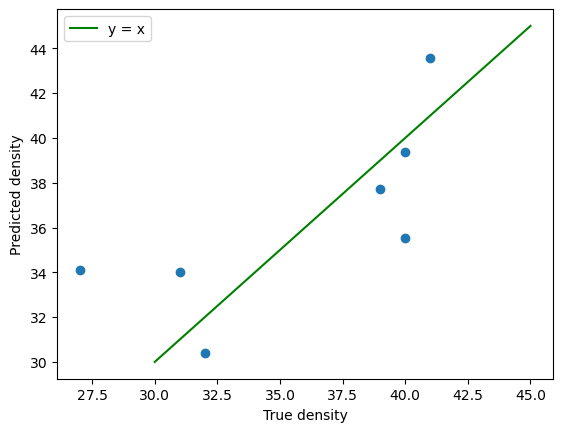

In [58]:
plt.scatter(block_0104_true_and_forecasted_values_df['True_count'], block_0104_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([30, 45], [30, 45], color='green', label='y = x')
plt.legend()
plt.show()

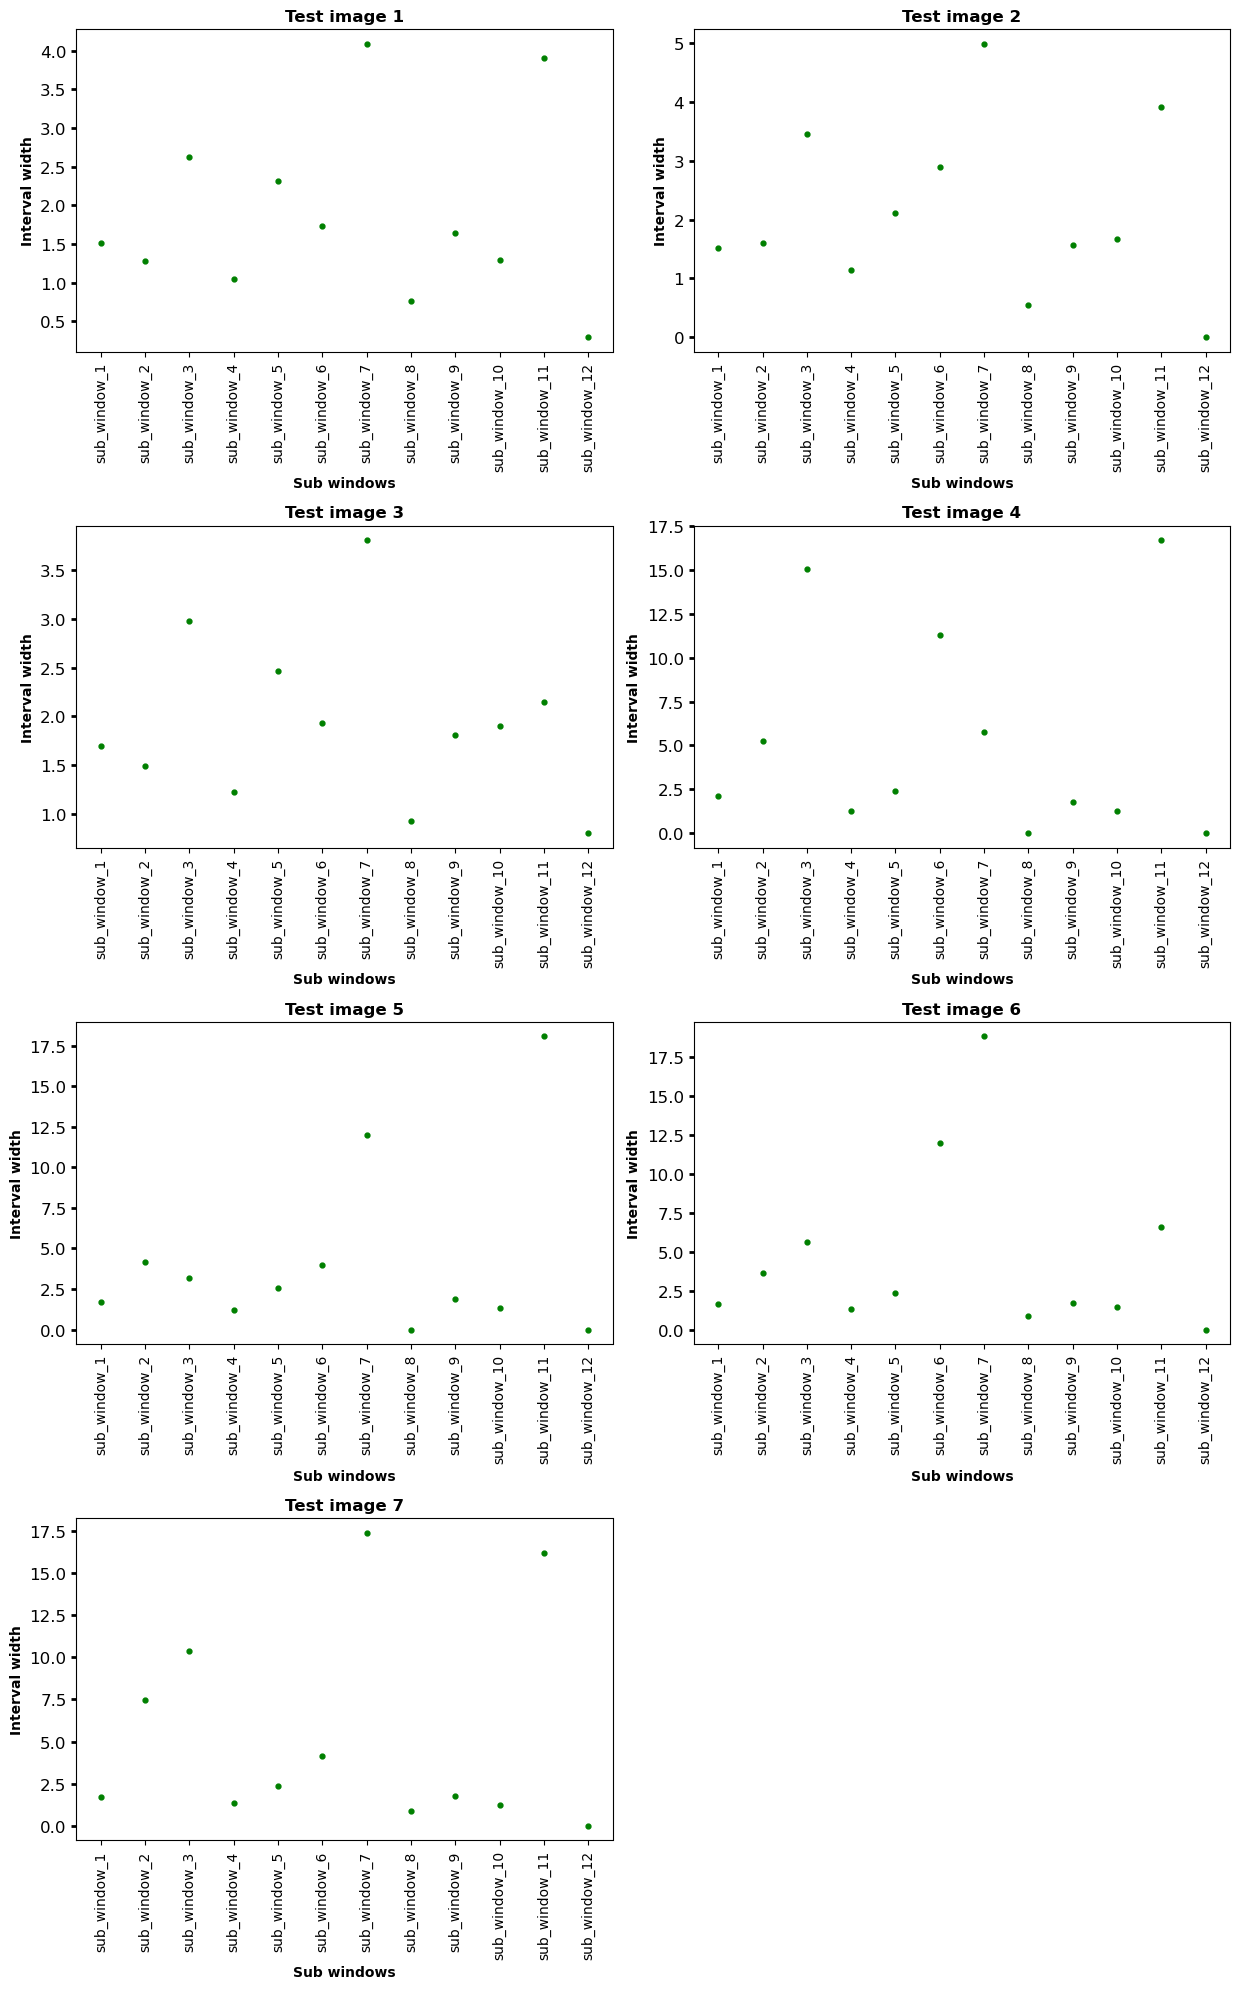

CPU times: user 1.57 s, sys: 688 ms, total: 2.26 s
Wall time: 1.52 s


In [59]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(12.5,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for file in loaded_npy_files:
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    li = np.percentile(stacked_forecasts, axis = 1, q = (2.5, 97.5))[0,:].reshape(-1,1)    
    ui = np.percentile(stacked_forecasts, axis = 1, q = (2.5, 97.5))[1,:].reshape(-1,1)
    width = ui - li
    # create a subwindow list
    subs_list = ['sub_window_' + str(j+1) for j in range(12)]
    axes[i].plot(subs_list, width, marker='o', markersize = 3.5, linestyle = "None", color = 'green')
    axes[i].set_xticks(np.arange(0, 12))
    axes[i].set_xticklabels([f'sub_window_{m + 1}' for m in range(12)], rotation=90, fontsize=10)
    axes[i].tick_params(axis='y', labelsize=12, width = 2)
    # Labels and legend
    axes[i].set_xlabel("Sub windows", fontsize=10, fontweight='bold')
    axes[i].set_ylabel("Interval width", fontsize=10, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# Save the figure as a PDF file
plt.savefig("Previous_data/Interval_widths_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()

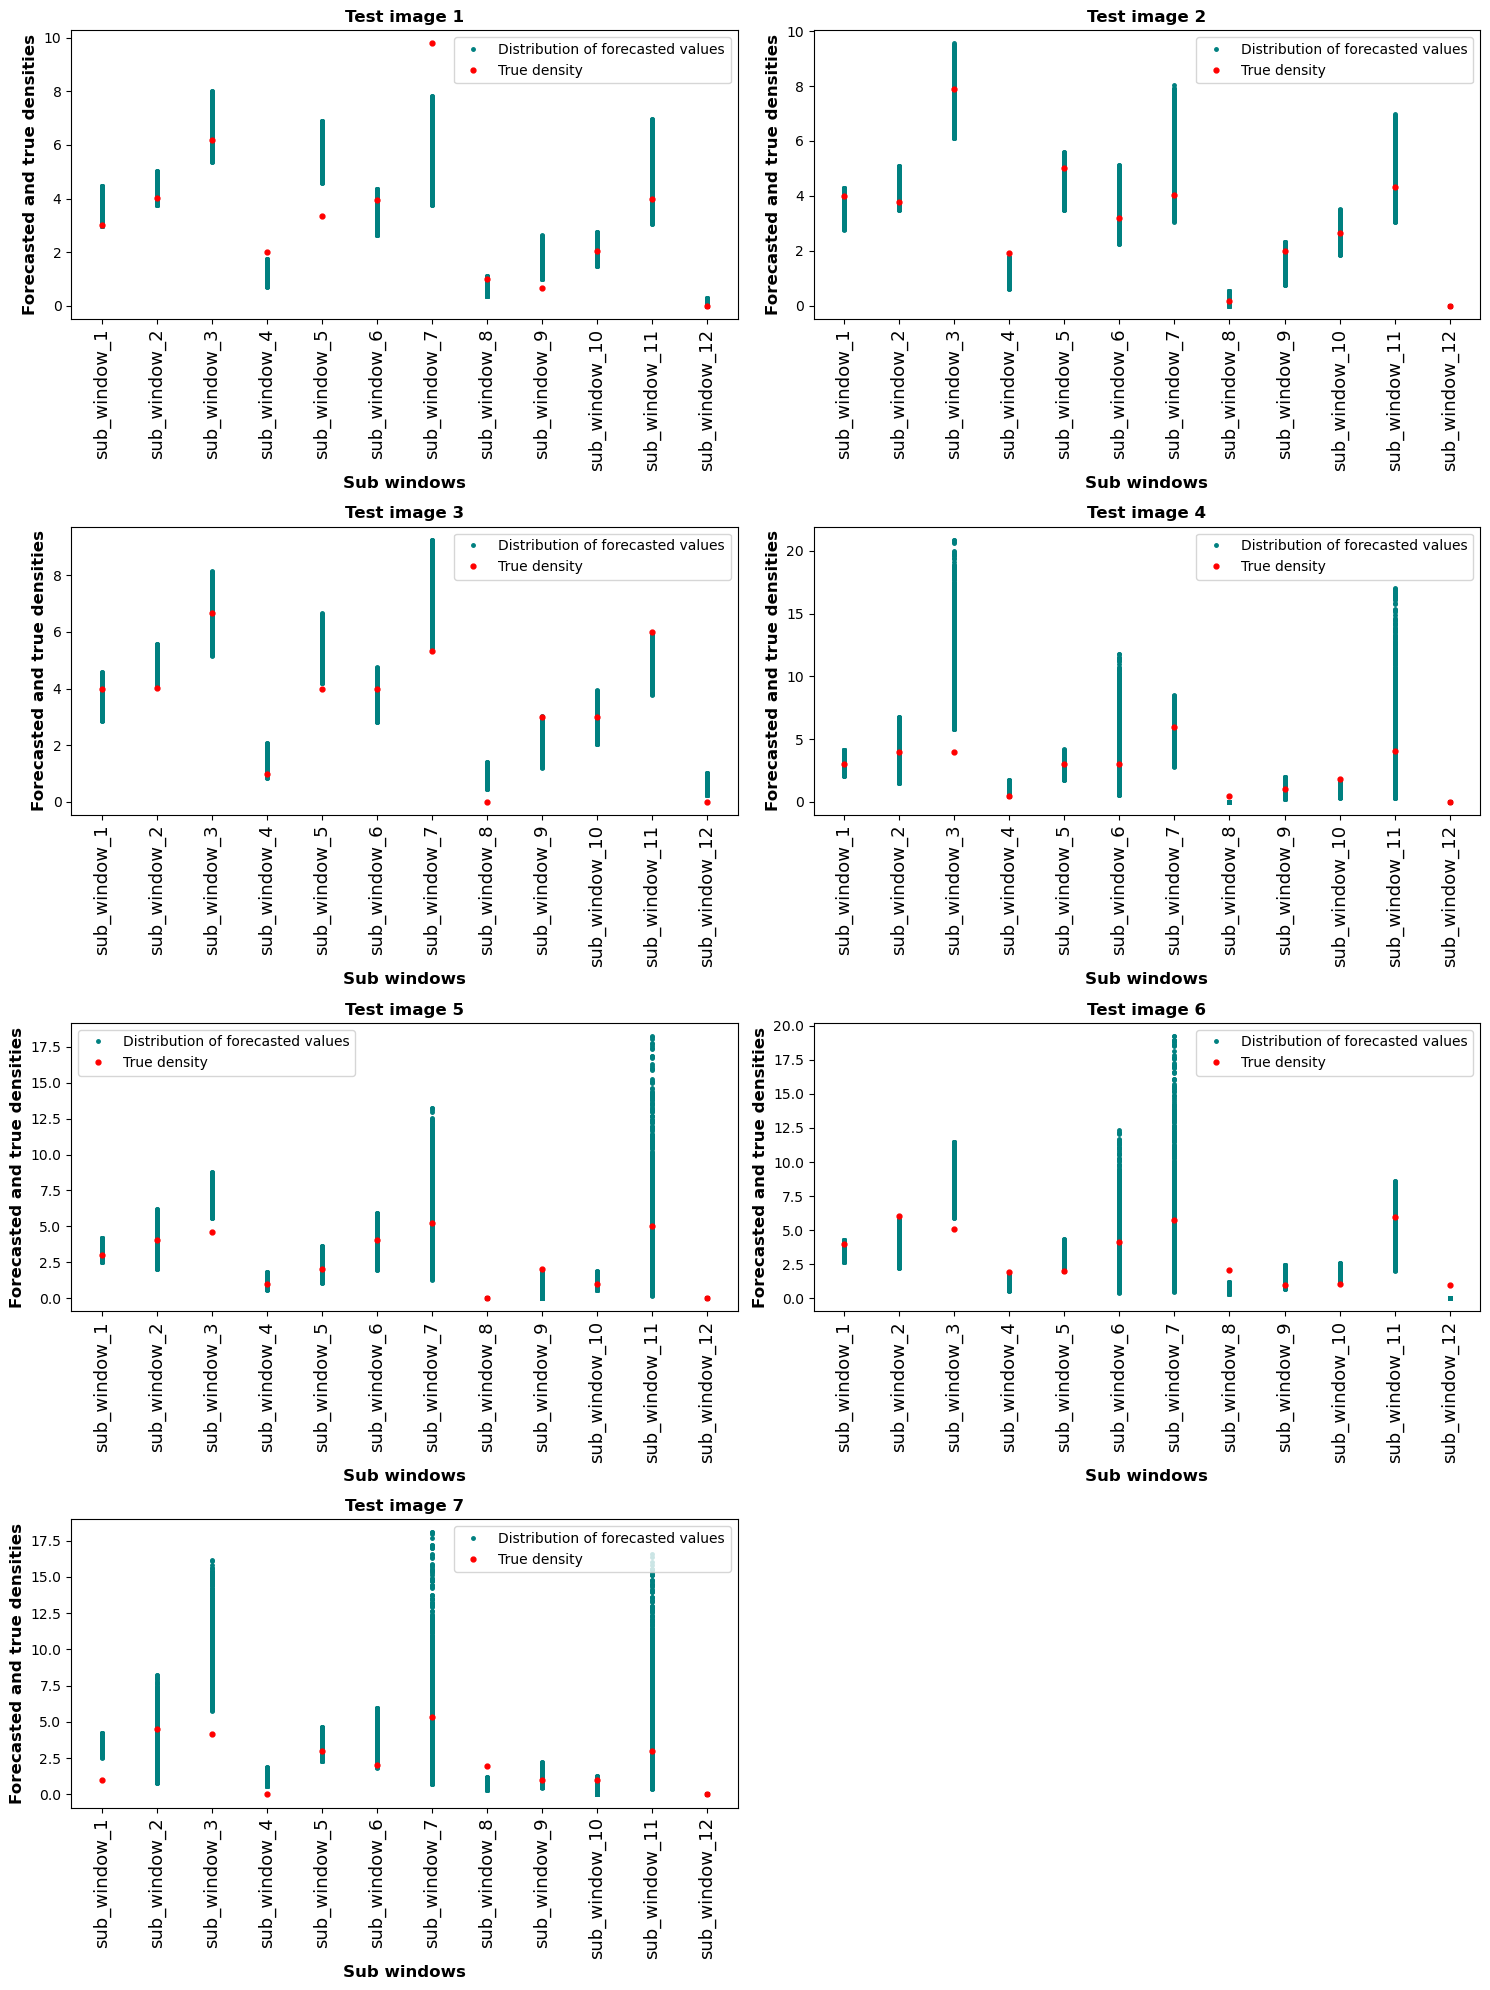

CPU times: user 2.96 s, sys: 708 ms, total: 3.66 s
Wall time: 2.92 s


In [60]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=2.5, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 13), true_counts, 'o', markersize=3.5, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 13))
    axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(12)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# Save the figure as a PDF file
plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [61]:
# Save chosen data

### What goes on from here?

In [62]:
# for each loaded file - per sub window forecasts for each time period in test set, get the forecasted value at time 1
All_timestep_2_subwindows = []
for file in loaded_npy_files:
    t2_forecast = file[:,3]
    # print the shape of the extracted array
    print(t2_forecast.shape)
    All_timestep_2_subwindows.append(t2_forecast)

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


In [63]:
loaded_npy_files[0].shape

(1000, 7)

In [64]:
# stack all these together?
stacked_forecasts_time_2 = np.stack(All_timestep_2_subwindows)
# print shape
stacked_forecasts_time_2.shape

(12, 1000)

In [65]:
stacked_forecasts_time_2[stacked_forecasts_time_2 <0] = 0

In [66]:
li_train_2 = np.percentile(stacked_forecasts_time_2, axis = 1, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train_2 = np.percentile(stacked_forecasts_time_2, axis = 1, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [67]:
li_train_2,ui_train_2

(array([[2.06217631],
        [1.49222174],
        [5.82040111],
        [0.4726627 ],
        [1.76068518],
        [0.53102915],
        [2.79499187],
        [0.        ],
        [0.2576526 ],
        [0.33989743],
        [0.31907944],
        [0.        ]]),
 array([[ 4.17742981],
        [ 6.77057086],
        [20.89222937],
        [ 1.72447681],
        [ 4.18903617],
        [11.81780512],
        [ 8.54121773],
        [ 0.        ],
        [ 2.02847899],
        [ 1.61727672],
        [17.0047996 ],
        [ 0.        ]]))

In [68]:
width_time_2 = ui_train_2 - li_train_2
width_time_2

array([[ 2.1152535 ],
       [ 5.27834913],
       [15.07182826],
       [ 1.25181411],
       [ 2.42835099],
       [11.28677597],
       [ 5.74622586],
       [ 0.        ],
       [ 1.77082638],
       [ 1.27737928],
       [16.68572017],
       [ 0.        ]])

In [69]:
width_time_2.shape

(12, 1)

In [70]:
# create a subwindow list
subs_list = ['sub_window_' + str(i+1) for i in range(width_time_2.shape[0])]

In [71]:
subs_list

['sub_window_1',
 'sub_window_2',
 'sub_window_3',
 'sub_window_4',
 'sub_window_5',
 'sub_window_6',
 'sub_window_7',
 'sub_window_8',
 'sub_window_9',
 'sub_window_10',
 'sub_window_11',
 'sub_window_12']

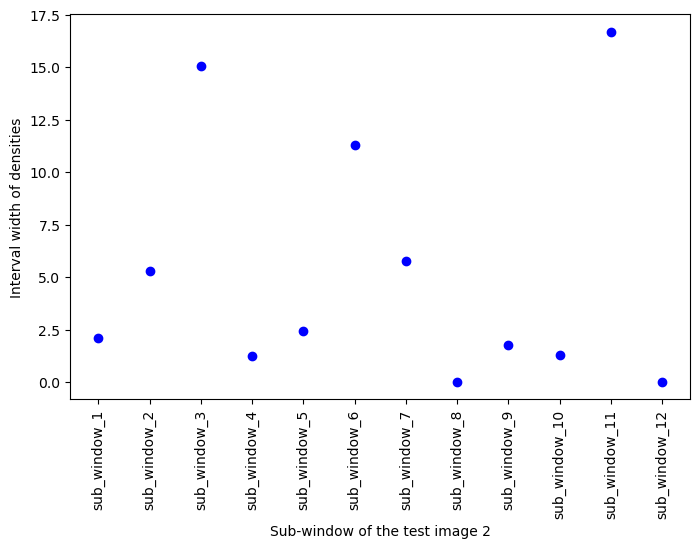

In [72]:
plt.figure(figsize = (8,5))
plt.plot(subs_list, width_time_2, marker='o', linestyle = "None", color = 'blue')
plt.xticks(rotation=90)
plt.xlabel("Sub-window of the test image 2")
plt.ylabel("Interval width of densities")
plt.show()

In [73]:
# save the widths
np.save("Previous_data/block_13_widths.npy", width_time_2)

In [74]:
# Okay, now, what if we try to plot the ranges instead of this width value

In [75]:
stacked_forecasts_time_2.shape

(12, 1000)

In [76]:
sorted_stacked_forecasts_time_2 = np.sort(stacked_forecasts_time_2, axis = 1)

In [77]:
sorted_stacked_forecasts_time_2.shape

(12, 1000)

In [78]:
# get the values between the 2.5th and 97.5th percentile?
sorted_interval_data_2 = sorted_stacked_forecasts_time_2[:,25:975]

In [79]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,3.000000,4.008115,6.203186,2.000008,3.344058,3.945553,9.788759,1.000653,0.655942,2.054460,3.999930,0.000000
1,4.002516,3.788700,7.895105,1.922893,5.020036,3.211300,4.032668,0.171887,1.977448,2.655942,4.321506,0.000000
2,4.000155,4.004598,6.674110,0.999997,3.999845,3.995401,5.325889,0.000005,3.000000,3.000000,5.999987,0.000013
3,3.000000,4.000000,4.000031,0.500000,3.000000,3.054460,5.999969,0.500000,1.000000,1.865198,4.080343,0.000000
4,3.000000,4.022552,4.633390,0.985549,2.000000,4.080343,5.255614,0.022552,2.000000,1.000032,4.991866,0.008102
5,4.000000,6.054452,5.051952,1.948060,2.000000,4.117899,5.764955,2.056697,1.000000,1.012700,5.995372,1.000000
6,1.000000,4.500000,4.155932,0.002526,2.999326,2.000000,5.344027,1.997659,1.000674,1.000000,3.000031,0.000000


In [80]:
exp_true.iloc[3,:].values

array([3.00000002, 4.00000015, 4.00003114, 0.49999998, 3.00000002,
       3.05445983, 5.99996875, 0.49999998, 1.        , 1.86519766,
       4.08034274, 0.        ])

In [81]:
# save the arrays
np.save("Previous_data/chosen_subplots/block_13_distribution.npy", sorted_interval_data_2)
np.save("Previous_data/chosen_subplots/block_13_true.npy", exp_true.iloc[3,:].values)

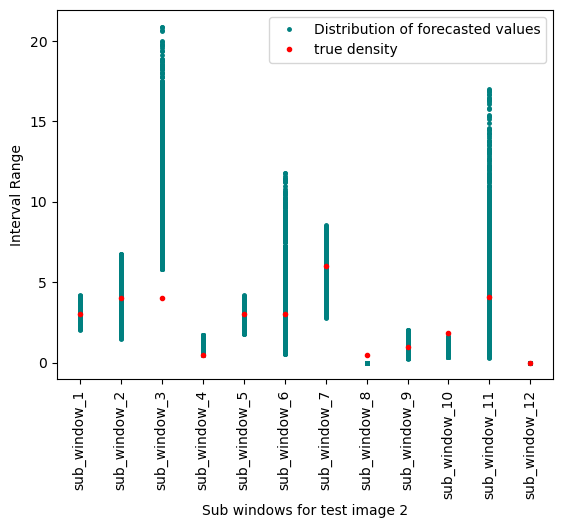

In [82]:
# our existing data
for i, row in enumerate(sorted_interval_data_2):
    plt.plot([i + 1] * len(row), row, 'o', markersize=2.5, color='teal', label='Distribution of forecasted values' if i == 0 else "")

# New 1D NumPy array with 12 individual values
values_1d = exp_true.iloc[3,:].values  #  actual 1D array

# Overlay the individual values on the same x-ticks
x_positions = np.arange(1, len(values_1d) + 1)
plt.plot(x_positions, values_1d, 'o', markersize=3, color='red', label='true density')

# Customize the x-ticks
plt.xticks(x_positions, ['sub_window_' + str(i + 1) for i in range(len(values_1d))], rotation=90)

# Labels and legend
plt.ylabel("Interval Range")
plt.xlabel("Sub windows for test image 2")
plt.legend()
# plt.title("Dot Plot with Overlayed 1D Array Values")

# Show the plot
plt.show()